Imports

In [312]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Functions

In [313]:
def crop_barcode(img):
    # Find contours in the binary image
    contours, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Find the horizontal limits of the barcode
    x_min = min([cv.boundingRect(contour)[0] for contour in contours])  # Leftmost x-coordinate
    x_max = max([cv.boundingRect(contour)[0] + cv.boundingRect(contour)[2] for contour in contours])  # Rightmost x-coordinate

    # Assume the largest contour corresponds to the vertical extent of the barcode
    largest_contour = max(contours, key=cv.contourArea)
    _, y, _, h = cv.boundingRect(largest_contour)  # Get the y and height (vertical cropping)

    # Crop the image so that only the barcode is visible
    cropped_img = img[y:y + h, x_min:x_max]
    
    # Draw the bounding rectangle of the largest contour in green
    cv.rectangle(img, (x_min, y), (x_max, y + h), (0, 255, 0), 2)

    # Draw all contours in red
    contour_img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)  # Convert to BGR for colored drawing
    cv.drawContours(contour_img, contours, -1, (0, 0, 255), 2)  # Draw all contours in red

    return cropped_img, contour_img

def display_image(img, title):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

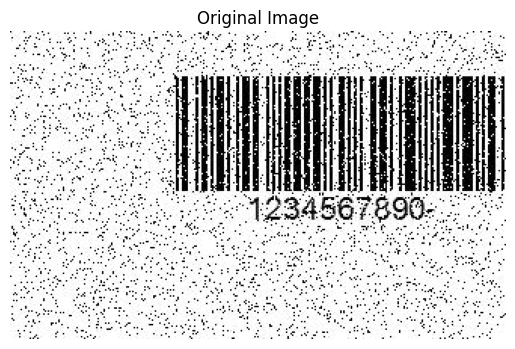

In [314]:
img = cv.imread('Samples/image1.jpg', cv.IMREAD_GRAYSCALE)

# Display the image 
display_image(img, 'Original Image')

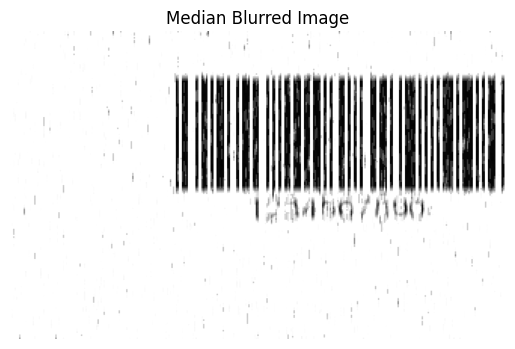

In [315]:
# Apply Median Filter vertically only
kernel = np.ones((7,1),np.float32)/5
median_blurred_img = cv.filter2D(img,-1,kernel)

# Display the image
display_image(median_blurred_img, 'Median Blurred Image')

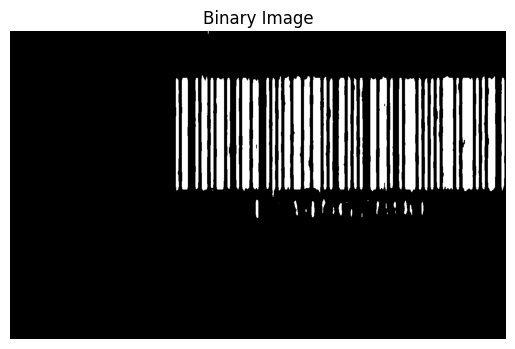

In [316]:
# Resize the image to increase its dimensions
scale_factor = 4  # Adjust the scale factor as needed
resized_img = cv.resize(median_blurred_img, (median_blurred_img.shape[1] * scale_factor, median_blurred_img.shape[0] * scale_factor))
# Binarize the image using a threshold
_, binary_img = cv.threshold(resized_img, 128, 255, cv.THRESH_BINARY_INV)

# Display the image
display_image(binary_img, 'Binary Image')

In [317]:
kernel_height1 = 13
kernel_width1 = 13  
kernel1 = np.zeros((kernel_height1, kernel_width1), np.uint8)
kernel1[:, kernel_width1 // 2] = 1

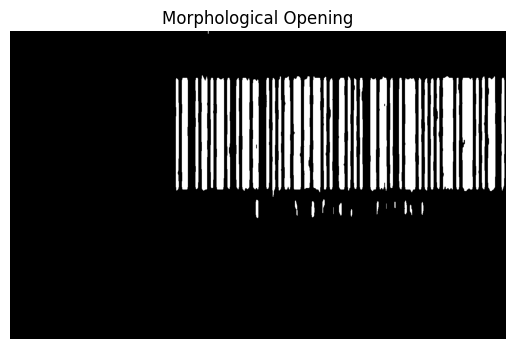

In [318]:
opened_img = cv.morphologyEx(binary_img, cv.MORPH_OPEN, kernel1)
display_image(opened_img, 'Morphological Opening')

In [319]:
kernel_height1 = 21  
kernel_width1 = 21 
kernel1 = np.zeros((kernel_height1, kernel_width1), np.uint8)
kernel1[:, kernel_width1 // 2] = 1  

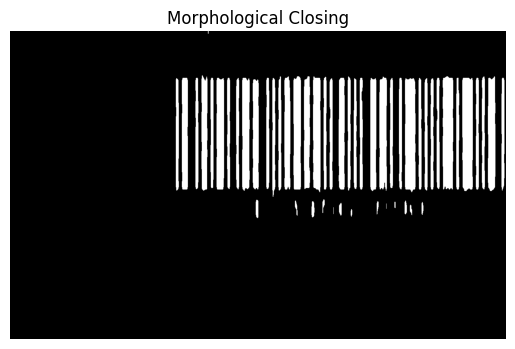

In [320]:
closed_img = cv.morphologyEx(opened_img, cv.MORPH_CLOSE, kernel1)
display_image(closed_img, 'Morphological Closing')

In [321]:
kernel_height2 = 1 
kernel_width2 = 5  
kernel2 = np.ones((kernel_height2, kernel_width2), np.uint8)

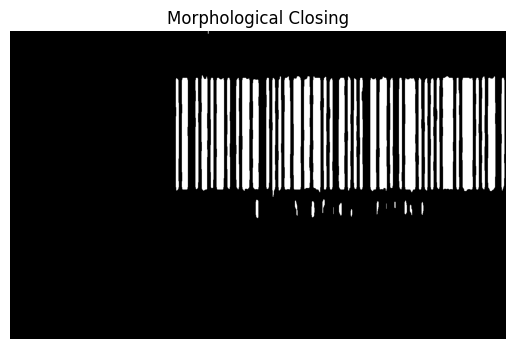

In [322]:
closed_again = cv.morphologyEx(closed_img, cv.MORPH_CLOSE, kernel2)
display_image(closed_again, 'Morphological Closing')

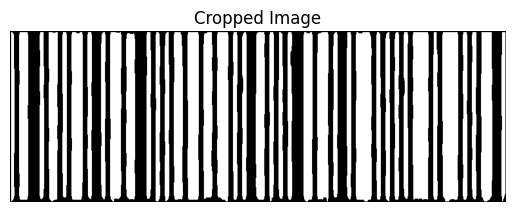

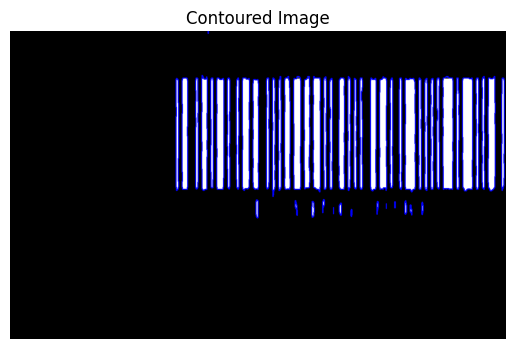

In [323]:
cropped_img, contoured_img = crop_barcode(closed_again)
display_image(cropped_img, 'Cropped Image')
display_image(contoured_img, 'Contoured Image')

In [324]:
# Create a vertical kernel (all 1's vertically)
kernel_vertical = np.ones((17, 1), np.uint8)  # Adjust the height as needed

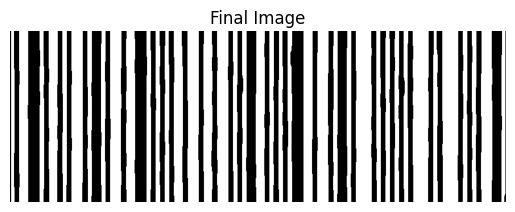

In [325]:
# Apply dilation with the vertical kernel
dilated_img = cv.dilate(cropped_img, kernel_vertical)
final_img = cv.morphologyEx(cropped_img, cv.MORPH_CLOSE, kernel1)
display_image(final_img, 'Final Image')

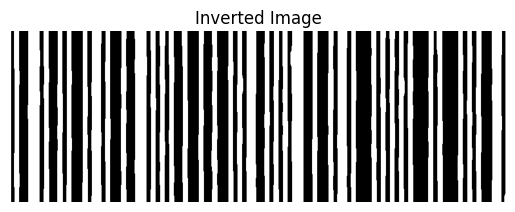

In [326]:
# Invert 
inverted_img = cv.bitwise_not(final_img)
display_image(inverted_img, 'Inverted Image')